# Review

### - Running these cells will display the data from the most recent run of the PCR Thermal Cycler prototype or the data from a specified trial by inputting the file name.

## Display Results From Most Recent Run
### - Displayed here is a run using my TCLab device.

In [95]:
# read data file

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/reviewfile.csv').set_index('Time')[1:]
t = data.index
T1 = data['T1'].values
T2 = data['T2'].values
SP1 = data['SP1'].values
SP2 = data['SP2'].values
U1 = data['Q1'].values
U2 = data['Q2'].values

# known parameter values
T_ambient = (T1[0] + T2[0])/2.0
T_ambient

P1 = 0.013*P1.mean()
P2 = 0.013*P2.mean()

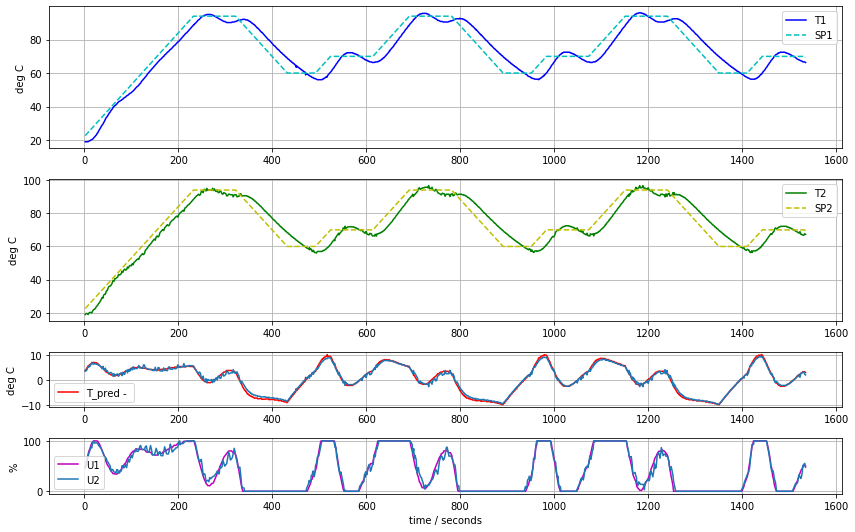

In [96]:
# data plotting function

def plot_data(t, T1, SP1, T2, SP2, U1, U2):
    
    fig = plt.figure(figsize=(12,7.5))
    grid = plt.GridSpec(6, 1)
    ax = [fig.add_subplot(grid[:2]), fig.add_subplot(grid[2:4]), fig.add_subplot(grid[4]), fig.add_subplot(grid[5])]

    ax[0].plot(t, T1, 'b', t, SP1, 'c--')
    ax[0].set_ylabel("deg C")
    ax[0].legend(["T1", "SP1"])
    
    ax[1].plot(t, T2, 'g', t, SP2, 'y--')
    ax[1].set_ylabel("deg C")
    ax[1].legend(["T2", "SP2"])
    
    ax[2].plot(t, SP1 - T1, 'r', t, SP2 - T2)
    ax[2].set_ylabel("deg C")
    ax[2].legend(["T_pred - "])
    
    ax[3].plot(t, U1,'m', t, U2)
    ax[3].set_ylabel("%")
    ax[3].legend(["U1", "U2"])
    
    for a in ax: a.grid(True)
    ax[-1].set_xlabel("time / seconds")
    plt.tight_layout()
    
plot_data(t, T1, SP1, T2, SP2, U1, U2)

## Review results from a chosen run by inputting the file name
- Input filename... format should be data/ and then the name of the file (example: data/data_20203407T113435.csv).
- Run the following cell and the results for selected file will display.
- Displayed here is the most recent simulation run.

In [83]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filenamew = widgets.Text(
    
    placeholder='Type something',
    description='File Name:',
    disabled=False
)

display(filenamew)



Text(value='', description='File Name:', placeholder='Type something')

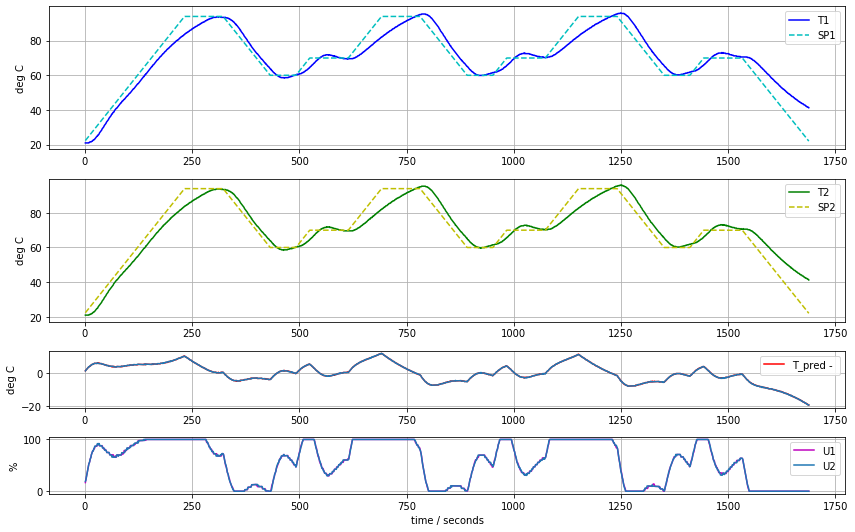

In [101]:
filename = filenamew.value

def review(filename):
    # read data file

    import pandas as pd
    import matplotlib.pyplot as plt

    data = pd.read_csv(filename).set_index('Time')[1:]
    t = data.index
    T1 = data['T1'].values
    T2 = data['T2'].values
    SP1 = data['SP1'].values
    SP2 = data['SP2'].values
    U1 = data['Q1'].values
    U2 = data['Q2'].values
    
    
    # known parameter values
    T_ambient = (T1[0] + T2[0])/2.0
    T_ambient

    #P1 = 0.013*P1.mean()
    #P2 = 0.013*P2.mean()
    
    plot_data(t, T1, SP1, T2, SP2, U1, U2)
    
review(filename)